## Load Data

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
import time

#  Import and read the data
application_df = pd.read_csv("../Resources/IMDB_OMDB_FINAL.csv")
print(f'movie dataframe length: {len(application_df)}')
print(f'movie dataframe columns: {application_df.columns}')
print('-----------------------------------------------------')

user_df = pd.read_csv("../Resources/User_Rating_Input_movies_formatted .csv")
print(f'user dataframe length: {len(user_df)}')
user_df.head()

Using TensorFlow backend
movie dataframe length: 221933
movie dataframe columns: Index(['Unnamed: 0', 'tconst', 'averageRating', 'numVotes', 'isAdult',
       'startYear', 'runtimeMinutes', 'genres', 'Movie', 'OMDB_Title',
       'OMDB_Rated', 'OMDB_Runtime', 'OMDB_Genre', 'OMDB_Director',
       'OMDB_Writer', 'OMDB_Actors', 'OMDB_Language', 'OMDB_Country',
       'OMDB_Type', 'OMDB_Metascore', 'OMDB_imdbRating', 'OMDB_imdbVotes',
       'OMDB_BoxOffice', 'OMDB_Production', 'ReleaseYear', 'ReleaseMonth',
       'Director_Avg_Rating', 'Writer_Avg_Rating', 'Actor_Avg_Rating'],
      dtype='object')
-----------------------------------------------------
user dataframe length: 6047


,Column1,ReleaseDate,Movie,ProductionBudget,DomesticGross,WorldwideGross,OMDB_Title,OMDB_Rated,OMDB_Released,OMDB_Runtime,...,OMDB_Actors,OMDB_Language,OMDB_Country,OMDB_Metascore,OMDB_imdbRating,OMDB_imdbVotes,OMDB_BoxOffice,OMDB_Production,User_rating,tconst
0,0,44904,Avatar: The Way of Water,460000000,684075767,2319591720,Avatar: The Way of Water,PG-13,44911.0,192.0,...,"Sam Worthington, Zoe Saldana, Sigourney Weaver",English,United States,67.0,7.6,466460.0,684075767.0,NaN,8.5,tt1630029
1,1,43578,Avengers: Endgame,400000000,858373000,2788912285,Avengers: Endgame,PG-13,43581.0,181.0,...,"Robert Downey Jr., Chris Evans, Mark Ruffalo","English, Japanese, Xhosa, German",United States,78.0,8.4,1223491.0,858373000.0,NaN,8.0,tt4154796
2,2,40683,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,Pirates of the Caribbean: On Stranger Tides,PG-13,40683.0,136.0,...,"Johnny Depp, PenÃ©lope Cruz, Ian McShane","English, Spanish","United States, United Kingdom",45.0,6.6,552123.0,241071802.0,NaN,NaN,tt1298650
3,3,42116,Avengers: Age of Ultron,365000000,459005868,1395316979,Avengers: Age of Ultron,PG-13,42125.0,141.0,...,"Robert Downey Jr., Chris Evans, Mark Ruffalo","English, Korean",United States,66.0,7.3,902827.0,459005868.0,NaN,7.0,tt2395427
4,4,45063,Fast X,340000000,145960660,714414576,Fast X,PG-13,45065.0,141.0,...,"Vin Diesel, Michelle Rodriguez, Jason Statham",English,"United States, China, Japan",56.0,5.8,101452.0,145960660.0,NaN,NaN,tt5433140


## Merge User rating with primary dataframe

In [3]:
# # Set user df to only contain those movies rated
# user_df = user_df.dropna(subset='User_rating')
# print(len(user_df))

301


In [3]:
application_df = pd.merge(application_df, user_df[['ProductionBudget', 'User_rating', 'tconst']], on='tconst', how='left')
print(len(application_df))
application_df

222041


,Unnamed: 0,tconst,averageRating,numVotes,isAdult,startYear,runtimeMinutes,genres,Movie,OMDB_Title,...,OMDB_imdbVotes,OMDB_BoxOffice,OMDB_Production,ReleaseYear,ReleaseMonth,Director_Avg_Rating,Writer_Avg_Rating,Actor_Avg_Rating,ProductionBudget,User_rating
0,0,tt0013274,6.8,59,0,2021,94,Documentary,Istoriya grazhdanskoy voyny,Istoriya grazhdanskoy voyny,...,58.0,NaN,NaN,2022.0,5.0,6.80,NaN,NaN,NaN,NaN
1,1,tt0015414,5.2,16,0,2000,60,Unknown,La tierra de los toros,La tierra de los toros,...,16.0,NaN,NaN,NaN,NaN,5.20,NaN,5.20,NaN,NaN
2,2,tt0015724,6.1,27,0,1993,102,Romance,Dama de noche,Dama de noche,...,27.0,NaN,NaN,1993.0,3.0,6.03,6.07,6.10,NaN,NaN
3,3,tt0035423,6.4,87965,0,2001,118,Comedy,Kate & Leopold,Kate & Leopold,...,87977.0,47121859.0,NaN,2001.0,12.0,7.17,6.86,6.51,NaN,NaN
4,4,tt0036606,6.5,345,0,1983,118,Drama,"Another Time, Another Place","Another Time, Another Place",...,338.0,NaN,NaN,1984.0,5.0,6.62,6.50,6.22,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222036,221928,tt9916270,5.8,1448,0,2020,84,Thriller,Il talento del calabrone,Il talento del calabrone,...,1448.0,NaN,NaN,2020.0,11.0,5.20,5.80,5.92,NaN,NaN
222037,221929,tt9916362,6.4,5609,0,2020,92,Drama,Coven,Coven,...,5603.0,NaN,NaN,2020.0,10.0,5.98,6.19,6.09,NaN,NaN
222038,221930,tt9916428,3.5,17,0,2019,0,Drama,The Secret of China,The Secret of China,...,17.0,NaN,NaN,2019.0,8.0,5.42,NaN,3.50,NaN,NaN
222039,221931,tt9916538,8.6,7,0,2019,123,Drama,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,...,6.0,NaN,NaN,2019.0,3.0,6.93,7.21,7.87,NaN,NaN


## Select the data to be used in the model

**Features**
* Our customers are movie goers for which Writer, Director, and key Actors are known so we are using Writer, Director, & Actor ratings
* While our initial data review did not show a relationship between release month and movie rating, it did show a relationship to box office returns so we are going to keep it in as a potential complex additive
* Runtime showed a very small relationship to IMDB rating alone

Notes: 
* We wanted to use a critic's score (Metascore as a proxy) that is available prior to the movie release which does show a positive correlation with IMDB ratings. However the availability reduces our row count from 160k to 16k and does not result in better performing machine learning models
* Budget is not available in this larger dataset
* kids vs. teens vs. adults as considered but showed little relevance in early experiments

**Target**

Our customers are the viewers that will provide the IMDB Rating after release so our target is the IMDB Rating: averageRating.

In [4]:
# Create the dataframe for the features and target
df_rating = application_df[['runtimeMinutes', 'averageRating', 'OMDB_Metascore', 'ProductionBudget', 
                            'genres', 'User_rating']]
# Drop rows with NaN values
df_rating = df_rating.dropna()

# View the dataframe and row count
print(len(df_rating))
df_rating.head()

272


,runtimeMinutes,averageRating,OMDB_Metascore,ProductionBudget,genres,User_rating
3331,137,6.3,41.0,165000000.0,Action,8.5
3418,105,7.8,71.0,144000000.0,Comedy,8.5
5357,102,6.4,70.0,200000000.0,Drama,7.2
8030,92,7.0,77.0,75000000.0,Comedy,6.2
8675,93,5.2,65.0,88000000.0,Comedy,8.1


## Encode categorical data for Random Forest

In [5]:
# using a copy of the dataframe for encoding and future Random Forest use
rf_df_rating = df_rating.copy()

# For simplicity, let's encode 'OMDB_Rated' using Label Encoding
le = LabelEncoder()
# rf_df_rating['OMDB_Rated'] = le.fit_transform(rf_df_rating['OMDB_Rated'])
rf_df_rating['genres'] = le.fit_transform(rf_df_rating['genres'])

## Split the data into sets for Random Forest

In [6]:
# Define features as X, target as y
y_rf = rf_df_rating['User_rating']
X_rf = rf_df_rating.drop(columns='User_rating')

# Split the data into training and testing sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

## Define the Random Forest Regression model; train it, test it, evaluate it

In [7]:
# Grab start time
start_time = time.time()

# Initialize the Random Forest Regressor
rf_model_rating = RandomForestRegressor(n_estimators=75, random_state=42)

# Train the model
rf_model_rating.fit(X_train_rf, y_train_rf)

# Make predictions on the test set
rating_predictions = rf_model_rating.predict(X_test_rf)

# Print time taken
print("--- %s seconds ---" % round((time.time() - start_time),2))

# Evaluate the model
mse = mean_squared_error(y_test_rf, rating_predictions)
print(f'Mean Squared Error: {mse}')

# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model_rating.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model_rating.feature_importances_, X_rf.columns), reverse=True)

--- 0.23 seconds ---
Mean Squared Error: 0.507420832323232


[(0.5530492011351532, 'averageRating'),
 (0.17240098763719397, 'OMDB_Metascore'),
 (0.1197726992809535, 'runtimeMinutes'),
 (0.1176324748408495, 'ProductionBudget'),
 (0.03714463710584982, 'genres')]

## Plot the Test predictions and actuals together

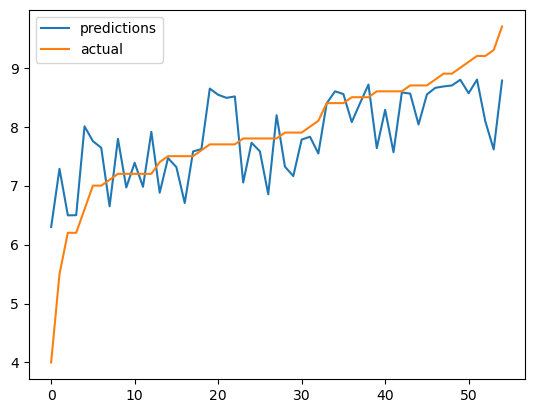

In [8]:
# Create a dataframe for the actual and prediction values
test_compare = pd.DataFrame({'orig_index':y_test_rf.index, 'actual':y_test_rf.values})
test_compare['predictions'] = rating_predictions
test_compare = test_compare.sort_values('actual').reset_index(drop=True)

# Plot the dataframe
lines = test_compare[['predictions', 'actual']].plot.line()

## Plot the Training predictions and actuals together

In [9]:
# Check the model against the training data - if mse is much lower than the model is overfitting
y_train_pred = rf_model_rating.predict(X_train_rf)
mse_train = mean_squared_error(y_train_rf, y_train_pred)
mse_train

0.07473276395289281

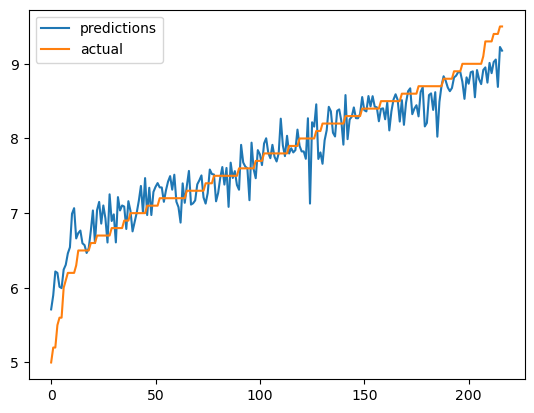

In [10]:
# Create a dataframe for the actual and prediction values
train_compare = pd.DataFrame({'orig_index':y_train_rf.index, 'actual':y_train_rf.values})
train_compare['predictions'] = y_train_pred
train_compare = train_compare.sort_values('actual').reset_index(drop=True)

# Plot the dataframe
train_lines = train_compare[['predictions', 'actual']].plot.line()

# Applying Keras Tuner

## Convert categorical data into dummy columns for Keras Tuner

In [12]:
df_rating = pd.get_dummies(data=df_rating, columns=['genres'])
print(len(df_rating.columns))
df_rating.head()

13


,runtimeMinutes,averageRating,OMDB_Metascore,ProductionBudget,User_rating,genres_Action,genres_Comedy,genres_Drama,genres_Family,genres_Horror,genres_Romance,genres_Thriller,genres_Western
3322,137,6.3,41.0,165000000.0,8.5,1,0,0,0,0,0,0,0
3406,105,7.8,71.0,144000000.0,8.5,0,1,0,0,0,0,0,0
5337,102,6.4,70.0,200000000.0,7.2,0,0,1,0,0,0,0,0
8005,92,7.0,77.0,75000000.0,6.2,0,1,0,0,0,0,0,0
8650,93,5.2,65.0,88000000.0,8.1,0,1,0,0,0,0,0,0


In [13]:
print(len(df_rating.columns))

13


## Split the data into training and test sets

In [14]:
# Define features as X, target as y
y = df_rating['User_rating']
X = df_rating.drop(columns='User_rating')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale the data

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Define the keras tuner behavior and execute

In [16]:
# Define the keras tuner parameters
def create_model(hp):
    movie_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])

    # Allow kerastuner to decide which optimizer
    optimizer = hp.Choice('opt', values=['adam', 'sgd', 'rmsprop'])
    
    # Allow kerastuner to decide number of neurons in first layer
    movie_model.add(tf.keras.layers.Dense(units=hp.Int('first_units', min_value=1, max_value=10, step=2), 
                                          activation=activation, input_dim=12))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        movie_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))

    movie_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    # Compile the model
    movie_model.compile(loss="mse", optimizer=optimizer, metrics=[tf.keras.metrics.MeanSquaredError()])

    return movie_model

In [17]:
tuner = kt.Hyperband(
    create_model,
    objective="val_loss",
    max_epochs=20,
    hyperband_iterations=2, 
    project_name='movie_user')

In [18]:
# Grab start time
start_time = time.time()

# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

# Print time taken
print("--- %s seconds ---" % round((time.time() - start_time),2))

# 181k rows, 22 dimensions = 104 minutes

Trial 60 Complete [00h 00m 04s]
val_loss: 49.99598693847656

Best val_loss So Far: 48.36135482788086
Total elapsed time: 00h 02m 38s
--- 158.06 seconds ---


In [19]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'opt': 'sgd',
 'first_units': 9,
 'num_layers': 4,
 'units_0': 5,
 'units_1': 9,
 'units_2': 9,
 'units_3': 3,
 'units_4': 5,
 'units_5': 7,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0042'}

In [20]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, MSE: {model_accuracy}")

2/2 - 0s - loss: 48.3614 - mean_squared_error: 48.3614 - 200ms/epoch - 100ms/step
Loss: 48.36135482788086, MSE: 48.36135482788086


In [21]:
# Check the model against the training data - if mse is much lower than the model is overtraining
model_loss_train, model_accuracy_train = best_model.evaluate(X_train_scaled,y_train,verbose=2)
print(f"Loss: {model_loss_train}, MSE: {model_accuracy_train}")

7/7 - 0s - loss: 46.6991 - mean_squared_error: 46.6991 - 44ms/epoch - 6ms/step
Loss: 46.6990966796875, MSE: 46.6990966796875


In [22]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 117       
                                                                 
 dense_1 (Dense)             (None, 5)                 50        
                                                                 
 dense_2 (Dense)             (None, 9)                 54        
                                                                 
 dense_3 (Dense)             (None, 9)                 90        
                                                                 
 dense_4 (Dense)             (None, 3)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 345 (1.35 KB)
Trainable params: 345 (1.35 

# Export the User Provided Results

In [11]:
print(f'df_rating length: {len(df_rating)}')
print(f'df_rating columns: {len(df_rating.columns)}')
print(f'test_compare length: {len(test_compare)}')
print(f'test_compare columns: {len(test_compare.columns)}')
print(f'train_compare length: {len(train_compare)}')
print(f'train_compare columns: {len(train_compare.columns)}')

df_rating length: 272
df_rating columns: 6
test_compare length: 55
test_compare columns: 3
train_compare length: 217
train_compare columns: 3


In [12]:
predict_compare = pd.concat([test_compare, train_compare])
print(f'predict_compare length: {len(predict_compare)}')
predict_compare.head(2)

predict_compare length: 272


,orig_index,actual,predictions
0,148802,4.0,6.297333
1,73394,5.5,7.285333


In [13]:
user_movie_predictions = df_rating.merge(predict_compare, left_on=df_rating.index, right_on='orig_index')
user_movie_predictions

,runtimeMinutes,averageRating,OMDB_Metascore,ProductionBudget,genres,User_rating,orig_index,actual,predictions
0,137,6.3,41.0,165000000.0,Action,8.5,3331,8.5,8.108000
1,105,7.8,71.0,144000000.0,Comedy,8.5,3418,8.5,8.516000
2,102,6.4,70.0,200000000.0,Drama,7.2,5357,7.2,7.138667
3,92,7.0,77.0,75000000.0,Comedy,6.2,8030,6.2,7.066667
4,93,5.2,65.0,88000000.0,Comedy,8.1,8675,8.1,7.725333
...,...,...,...,...,...,...,...,...,...
267,119,8.2,78.0,100000000.0,Drama,8.9,214440,8.9,8.700000
268,161,6.7,67.0,250000000.0,Drama,8.2,217918,8.2,7.661333
269,140,8.7,86.0,100000000.0,Action,8.7,219308,8.7,8.561333
270,132,7.4,71.0,150000000.0,Action,8.8,219371,8.8,8.633333


In [16]:
user_movie_predictions.to_csv("../Resources/user_only_model_results.csv")

# Use the Random Forest Model with as much data as possible

In [48]:
# Create the dataframe for the features and target
df_rating_not_user = application_df[['runtimeMinutes', 'averageRating', 'OMDB_Metascore', 'ProductionBudget', 
                            'genres']]
# Drop rows with NaN values
df_rating_not_user = df_rating_not_user.dropna()

# View the dataframe and row count
print(len(df_rating_not_user))
df_rating_not_user.head(3)

4388


,runtimeMinutes,averageRating,OMDB_Metascore,ProductionBudget,genres
282,116,6.9,79.0,12000000.0,Comedy
353,97,6.9,69.0,40000000.0,Comedy
387,108,7.4,86.0,18000000.0,Drama


In [49]:
# For simplicity, let's encode 'genres' using Label Encoding
le = LabelEncoder()
df_rating_not_user['genres'] = le.fit_transform(df_rating_not_user['genres'])
df_rating_not_user.head(3)

,runtimeMinutes,averageRating,OMDB_Metascore,ProductionBudget,genres
282,116,6.9,79.0,12000000.0,1
353,97,6.9,69.0,40000000.0,1
387,108,7.4,86.0,18000000.0,3


In [50]:
# Apply the model to the
all_user_pred = rf_model_rating.predict(df_rating_not_user)
all_user_pred

array([7.27333333, 7.28266667, 8.10933333, ..., 7.176     , 7.91066667,
       6.94533333])

In [51]:
# Pull the predictions into the dataframe
df_rating_not_user['predictions'] = all_user_pred

print(f'df length: {len(df_rating_not_user)}')
df_rating_not_user.head(3)

df length: 4388


,runtimeMinutes,averageRating,OMDB_Metascore,ProductionBudget,genres,predictions
282,116,6.9,79.0,12000000.0,1,7.273333
353,97,6.9,69.0,40000000.0,1,7.282667
387,108,7.4,86.0,18000000.0,3,8.109333


In [52]:
# Pull in other movie info
df_rating_not_user = pd.merge(df_rating_not_user, 
                              application_df[['tconst', 'numVotes', 'isAdult', 'startYear', 'genres', 
                                              'Movie', 'OMDB_Title', 'OMDB_Rated', 'OMDB_Runtime', 
                                              'OMDB_Genre', 'OMDB_Director', 'OMDB_Type', 'OMDB_imdbRating',
                                              'OMDB_Writer', 'OMDB_Actors', 'OMDB_Language', 'OMDB_Country',
                                              'OMDB_imdbVotes', 'OMDB_BoxOffice', 'OMDB_Production', 
                                              'ReleaseYear', 'ReleaseMonth', 'Director_Avg_Rating', 
                                              'Writer_Avg_Rating', 'Actor_Avg_Rating']], 
                              # on=index, how='left')
                              left_on=df_rating_not_user.index, right_on=application_df.index, how='left')

# Rename genres_y to genres and drop genres_y
df_rating_not_user['genres']=df_rating_not_user['genres_y']
df_rating_not_user = df_rating_not_user.drop(columns='genres_y')

print(f'df length: {len(df_rating_not_user)}')
print(df_rating_not_user.columns)
df_rating_not_user.head(3)

df length: 4388
Index(['key_0', 'runtimeMinutes', 'averageRating', 'OMDB_Metascore',
       'ProductionBudget', 'genres_x', 'predictions', 'tconst', 'numVotes',
       'isAdult', 'startYear', 'Movie', 'OMDB_Title', 'OMDB_Rated',
       'OMDB_Runtime', 'OMDB_Genre', 'OMDB_Director', 'OMDB_Type',
       'OMDB_imdbRating', 'OMDB_Writer', 'OMDB_Actors', 'OMDB_Language',
       'OMDB_Country', 'OMDB_imdbVotes', 'OMDB_BoxOffice', 'OMDB_Production',
       'ReleaseYear', 'ReleaseMonth', 'Director_Avg_Rating',
       'Writer_Avg_Rating', 'Actor_Avg_Rating', 'genres'],
      dtype='object')


,key_0,runtimeMinutes,averageRating,OMDB_Metascore,ProductionBudget,genres_x,predictions,tconst,numVotes,isAdult,...,OMDB_Country,OMDB_imdbVotes,OMDB_BoxOffice,OMDB_Production,ReleaseYear,ReleaseMonth,Director_Avg_Rating,Writer_Avg_Rating,Actor_Avg_Rating,genres
0,282,116,6.9,79.0,12000000.0,1,7.273333,tt0081633,67046,0,...,United Kingdom,66945.0,42365581.0,NaN,1981.0,11.0,6.93,6.80,6.36,Comedy
1,353,97,6.9,69.0,40000000.0,1,7.282667,tt0082031,30643,0,...,United States,30620.0,95461682.0,NaN,1981.0,7.0,6.90,5.73,5.86,Comedy
2,387,108,7.4,86.0,18000000.0,3,8.109333,tt0082085,60339,0,...,United States,60246.0,12000000.0,NaN,1981.0,7.0,6.43,5.64,5.85,Drama


In [53]:
# Re-order columns to original for compatibility with other parallel efforts
df_rating_not_user = df_rating_not_user[['tconst', 'averageRating', 'numVotes', 'isAdult','startYear', 
                                        'runtimeMinutes', 'genres', 'Movie', 'OMDB_Title', 'OMDB_Rated', 
                                        'OMDB_Runtime', 'OMDB_Genre', 'OMDB_Director', 'OMDB_Writer', 
                                        'OMDB_Actors', 'OMDB_Language', 'OMDB_Country', 'OMDB_Type', 
                                        'OMDB_Metascore', 'OMDB_imdbRating', 'OMDB_imdbVotes', 'OMDB_BoxOffice', 
                                        'OMDB_Production', 'ReleaseYear', 'ReleaseMonth', 'Director_Avg_Rating', 
                                        'Writer_Avg_Rating', 'Actor_Avg_Rating', 'ProductionBudget', 
                                         'genres_x', 'predictions']]
df_rating_not_user.head(3)

,tconst,averageRating,numVotes,isAdult,startYear,runtimeMinutes,genres,Movie,OMDB_Title,OMDB_Rated,...,OMDB_BoxOffice,OMDB_Production,ReleaseYear,ReleaseMonth,Director_Avg_Rating,Writer_Avg_Rating,Actor_Avg_Rating,ProductionBudget,genres_x,predictions
0,tt0081633,6.9,67046,0,1981,116,Comedy,Time Bandits,Time Bandits,kids,...,42365581.0,NaN,1981.0,11.0,6.93,6.80,6.36,12000000.0,1,7.273333
1,tt0082031,6.9,30643,0,1981,97,Comedy,Arthur,Arthur,kids,...,95461682.0,NaN,1981.0,7.0,6.90,5.73,5.86,40000000.0,1,7.282667
2,tt0082085,7.4,60339,0,1981,108,Drama,Blow Out,Blow Out,adults,...,12000000.0,NaN,1981.0,7.0,6.43,5.64,5.85,18000000.0,3,8.109333


In [54]:
df_rating_not_user.to_csv("../Resources/user_model_results_4400.csv")